<a href="https://colab.research.google.com/github/gmartinezav/gmartinezav/blob/main/Analisis_de_datos_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análisis exploratorio de datos EA FC25**

Resumen: la base de datos tiene un formato csv, en donde se encuentra estadisticas de jugadores del popular videojuego EA 25 (antiguamente FIFA)

In [4]:
import numpy as np # manejo de arreglos (álgebra lineal en python)
import pandas as pd # Manejo de Dataframes (tipos de datos)
import matplotlib.pyplot as plt # Gráficas
import seaborn as sns # gráficas estadísticas (histogramas)

# 2. Importar datos

La primera forma es importarlo localmente:

In [10]:
datos = pd.read_csv("/content/male_players.csv")
datos.head(10) # head significa la cabeza de los datos
datos.tail() #datos de los ultimos la cola

,Unnamed: 0,Rank,Name,OVR,PAC,SHO,PAS,DRI,DEF,PHY,...,Nation,League,Team,play style,url,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
16156,16156,17717,Engson Singh,47,31,45,47,52,34,45,...,India,ISL,Mohun Bagan SG,NaN,https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
16157,16157,17717,Ousmane Sylla,47,67,38,46,45,40,55,...,Senegal,MLS,Houston Dynamo,NaN,https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
16158,16158,17717,Wei Feng,47,57,47,38,50,43,49,...,China PR,CSL,Changchun Yatai,NaN,https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
16159,16159,17717,Won Hui Do,47,66,35,46,46,41,64,...,Korea Republic,K League 1,Jeju United,NaN,https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN
16160,16160,17717,Wu Yuhang,47,56,34,43,45,43,54,...,China PR,CSL,Zhejiang Pro,NaN,https://www.ea.com/games/ea-sports-fc/ratings/...,NaN,NaN,NaN,NaN,NaN


In [7]:
datos.info() # info de los jugadores

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16161 entries, 0 to 16160
Data columns (total 57 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             16161 non-null  int64  
 1   Rank                   16161 non-null  int64  
 2   Name                   16161 non-null  object 
 3   OVR                    16161 non-null  int64  
 4   PAC                    16161 non-null  int64  
 5   SHO                    16161 non-null  int64  
 6   PAS                    16161 non-null  int64  
 7   DRI                    16161 non-null  int64  
 8   DEF                    16161 non-null  int64  
 9   PHY                    16161 non-null  int64  
 10  Acceleration           16161 non-null  int64  
 11  Sprint Speed           16161 non-null  int64  
 12  Positioning            16161 non-null  object 
 13  Finishing              16161 non-null  object 
 14  Shot Power             16161 non-null  int64  
 15  Lo

In [8]:
datos.describe() # 1 columba numero del jugador en la lista de datos osea no sirve
# cuartil

,Unnamed: 0,Rank,OVR,PAC,SHO,PAS,DRI,DEF,PHY,Acceleration,...,Strength,Aggression,Weak foot,Skill moves,Age,GK Diving,GK Handling,GK Kicking,GK Positioning,GK Reflexes
count,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,...,16161.000000,16161.000000,16161.000000,16161.000000,16161.000000,1816.000000,1816.000000,1816.000000,1816.000000,1816.000000
mean,8080.000000,8934.139657,66.172390,68.149558,54.146835,58.434874,63.599158,50.591981,65.241755,64.778727,...,65.317121,56.342986,2.952045,2.393292,25.790545,65.282489,63.281388,62.361784,63.645925,66.120595
std,4665.423186,5003.925857,6.761979,10.612153,13.740389,9.660646,9.262399,16.323879,9.509657,15.478648,...,12.370667,16.771384,0.677057,0.783739,4.662681,7.351546,7.019344,7.403049,8.026517,7.775521
min,0.000000,1.000000,47.000000,29.000000,20.000000,25.000000,29.000000,15.000000,32.000000,15.000000,...,26.000000,11.000000,1.000000,1.000000,17.000000,45.000000,45.000000,44.000000,41.000000,45.000000
25%,4040.000000,5037.000000,62.000000,62.000000,45.000000,52.000000,58.000000,36.000000,59.000000,57.000000,...,58.000000,46.000000,3.000000,2.000000,22.000000,60.000000,58.000000,57.000000,58.000000,61.000000
50%,8080.000000,9009.000000,66.000000,69.000000,57.000000,59.000000,64.000000,55.000000,66.000000,68.000000,...,66.000000,60.000000,3.000000,2.000000,25.000000,65.000000,63.000000,62.000000,64.000000,66.000000
75%,12120.000000,13135.000000,70.000000,75.000000,64.000000,65.000000,70.000000,64.000000,72.000000,75.000000,...,74.000000,69.000000,3.000000,3.000000,29.000000,70.000000,68.000000,67.000000,69.000000,71.000000
max,16160.000000,17717.000000,91.000000,97.000000,93.000000,94.000000,92.000000,89.000000,91.000000,97.000000,...,95.000000,95.000000,5.000000,5.000000,44.000000,90.000000,90.000000,91.000000,90.000000,91.000000


In [ ]:
#Eliminar la columna índice
datos.drop("unnamed: 0", axis=1, inplace = True) # se escribe el nombre de la columna

el 1 significa columnas

In [9]:
datos.shape

(16161, 57)

Datos.shape: esto significa que contamos con 16161 muestras o samples y 57 columnas o variales

# 10. Ligas con mayor cantidad de jugadores

In [18]:
ligas = datos["League"].value_counts().head(10)

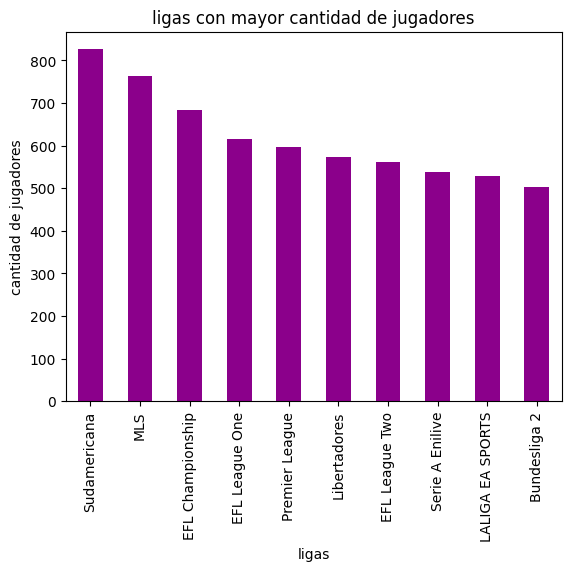

In [23]:
#Gráfica
plt.figure()
ligas.plot(kind = "bar", color ="darkmagenta")
plt.title("ligas con mayor cantidad de jugadores")
plt.xlabel("ligas")
plt.ylabel("cantidad de jugadores")
plt.show()

# Distribución del "Overall"

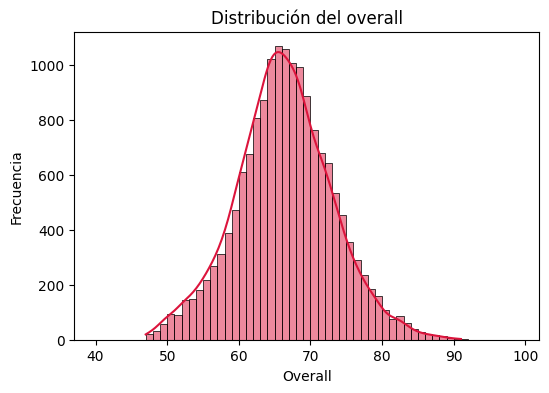

In [34]:
#creamos un histograma
x = datos["OVR"]
bins_ = np.arange(40,100,1)


plt.figure(figsize= (6,4))
sns.histplot(x = "OVR",data = datos, bins = bins_,kde = True, color = "crimson")
plt.title("Distribución del overall")
plt.xlabel("Overall")
plt.ylabel("Frecuencia")
plt.show()

## Overall por posición

In [42]:
# extraer los datos segun su posición
posiciones = datos.groupby('position')['OVR'].median().sort_values().index


KeyError: 'position'

In [39]:
posiciones

NameError: name 'posiciones' is not defined

In [ ]:
sns.boxplot(x = "position")
            y = "OVR"
            data = datos
            orden =)
plt.show()

## Diagrama de caja inbox

In [ ]:
#Diagrama de cajas (Boxplot)
plt.figure(figsize=(6,4))
sns.boxplot(x= 'position' # nombre de la variable